In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings

# Optional: Filter only relevant warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
data_path = 'Financial-Analytics-data1.csv' 
import pandas as pd
df = pd.read_csv(data_path)
df.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
0,Reliance Inds.,583436.72,99810.00,Large Cap,High Sales
1,TCS,563709.84,30904.00,Large Cap,High Sales
2,HDFC Bank,482953.59,20581.27,Large Cap,High Sales
3,ITC,320985.27,9772.02,Large Cap,High Sales
4,H D F C,289497.37,16840.51,Large Cap,High Sales


In [9]:
df.tail()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
454,Prime Focus,3031.50,609.61,Very Small Cap,Low Sales
455,Lak. Vilas Bank,3029.57,790.17,Very Small Cap,Low Sales
456,NOCIL,3026.26,249.27,Very Small Cap,Very Low Sales
457,Orient Cement,3024.32,511.53,Very Small Cap,Very Low Sales
458,Natl.Fertilizer,3017.07,2840.75,Very Small Cap,High Sales


In [10]:
df.shape

(459, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 459 non-null    object 
 1   Mar Cap - Crore      459 non-null    float64
 2   Sales Qtr - Crore    459 non-null    float64
 3   Market_Cap_Category  459 non-null    object 
 4   Sales_Qrt_Category   459 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.1+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mar Cap - Crore,459.0,28870.974139,60557.081792,3017.07,4942.815,10442.09,24707.320,583436.72
Sales Qtr - Crore,459.0,3807.789412,9989.449987,0.00,534.910,1137.17,2730.195,110666.93


<Axes: >

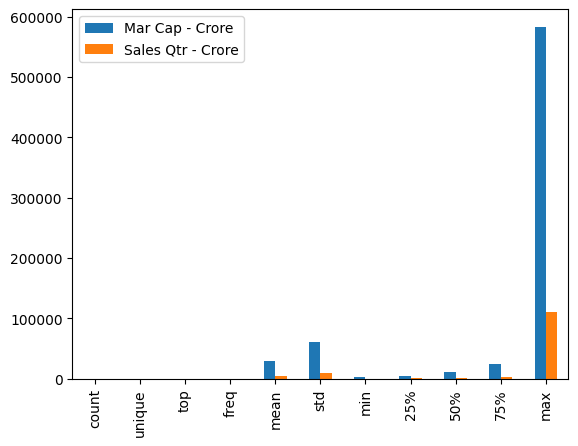

In [13]:
df.describe(include='all').plot(kind='bar')

In [14]:
df.isna().sum()

Name                   0
Mar Cap - Crore        0
Sales Qtr - Crore      0
Market_Cap_Category    0
Sales_Qrt_Category     0
dtype: int64

<Axes: >

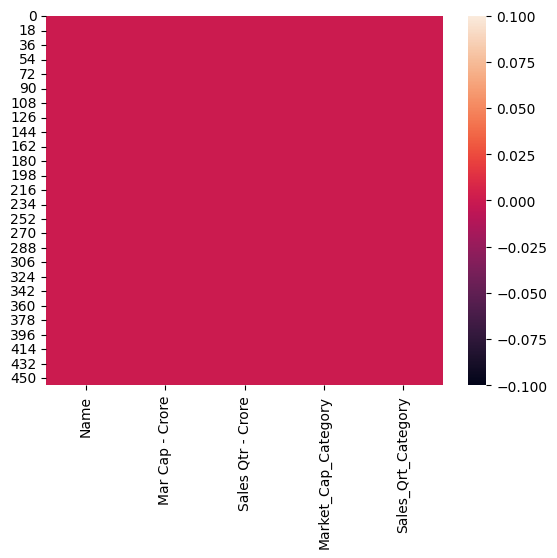

In [15]:
sns.heatmap(df.isna())

In [16]:
df.duplicated().sum()

np.int64(0)

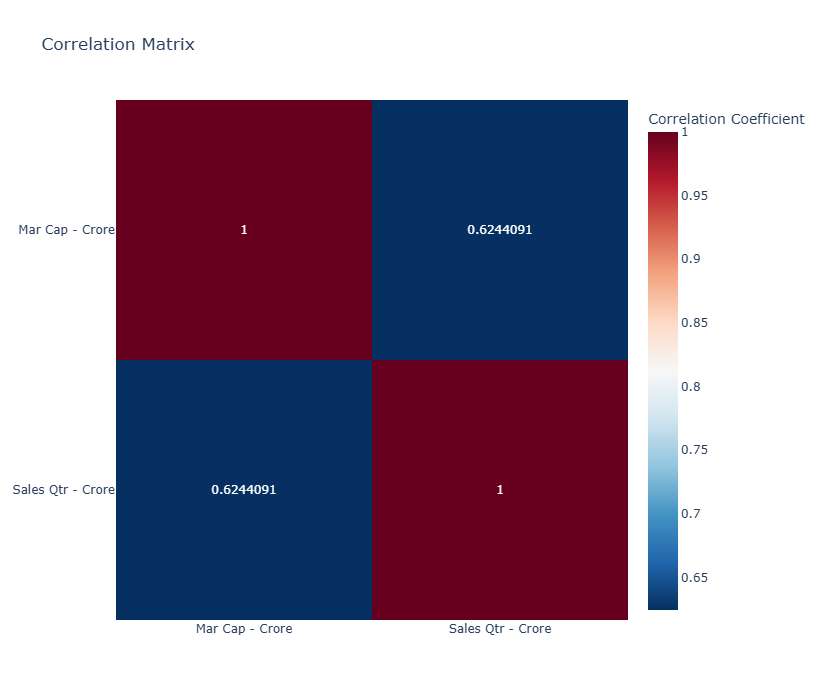

In [6]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined

# Pilih kolom numerik saja, dan drop baris yang memiliki nilai NaN
numeric_df = df.select_dtypes(include=[float, int]).dropna()

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Buat heatmap dari matriks korelasi
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r',
                labels=dict(color="Correlation Coefficient"))  # Label untuk skala warna
fig.update_layout(autosize=False, width=700, height=700)  # Sesuaikan ukuran heatmap

fig.show()



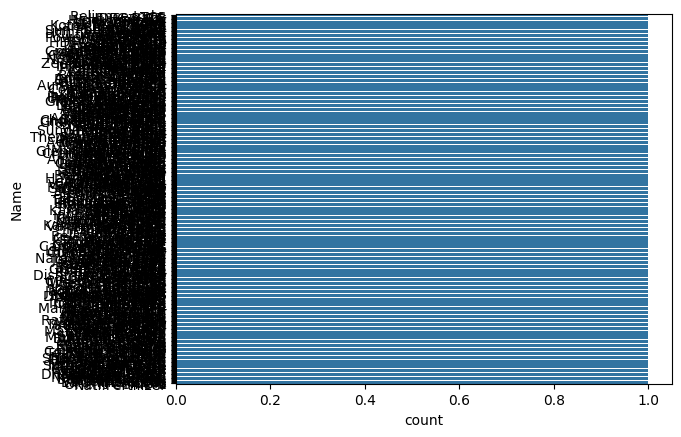

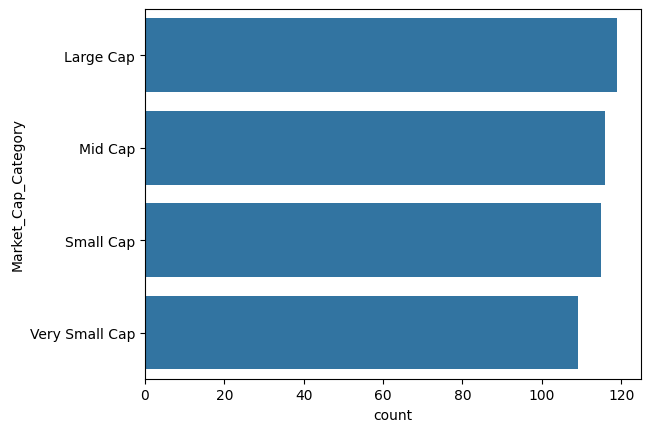

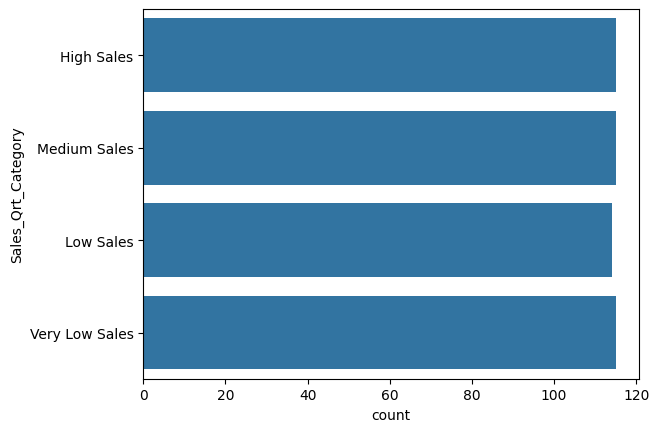

In [18]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(y=col,data=df)
        plt.show()

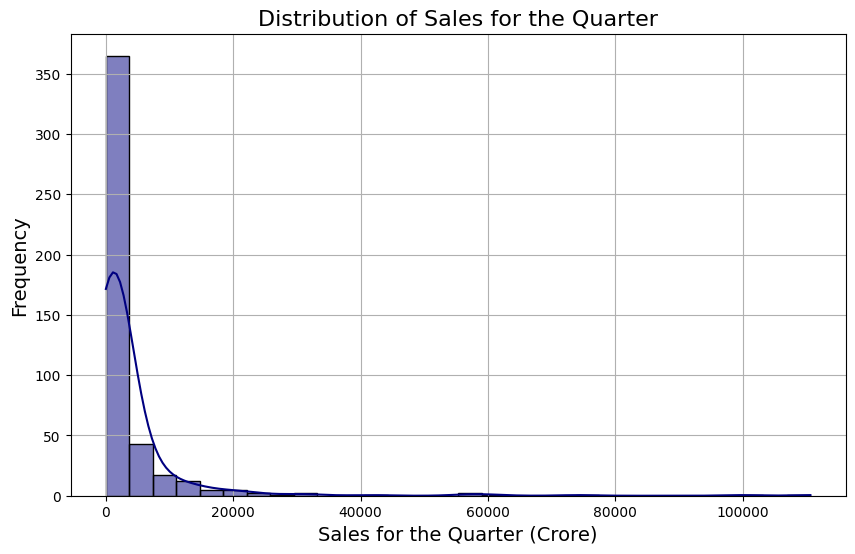

In [9]:
# Bersihkan data dari NaN jika ada
sales_data = df['Sales Qtr - Crore'].dropna()

# Plot distribusi
plt.figure(figsize=(10, 6))
sns.histplot(sales_data, kde=True, bins=30, color='navy')  # Bisa atur bins untuk detail yang lebih baik
plt.title('Distribution of Sales for the Quarter', fontsize=16)
plt.xlabel('Sales for the Quarter (Crore)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Tambahkan grid untuk visual yang lebih baik
plt.show()

In [20]:
df.columns.tolist()

['Name',
 'Mar Cap - Crore',
 'Sales Qtr - Crore',
 'Market_Cap_Category',
 'Sales_Qrt_Category']

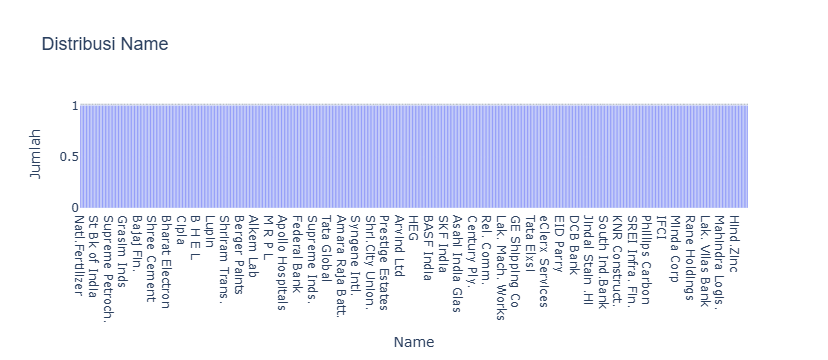

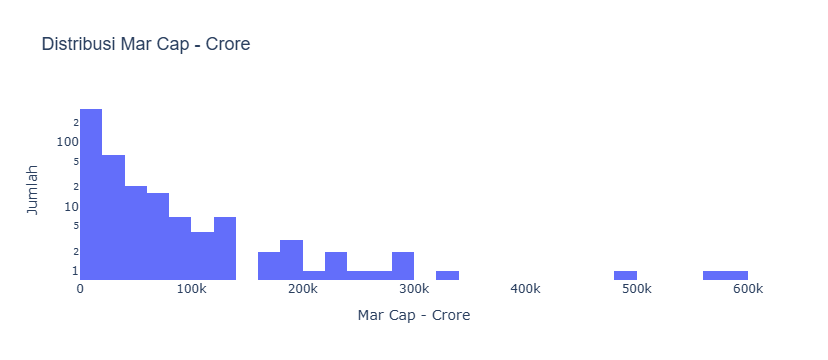

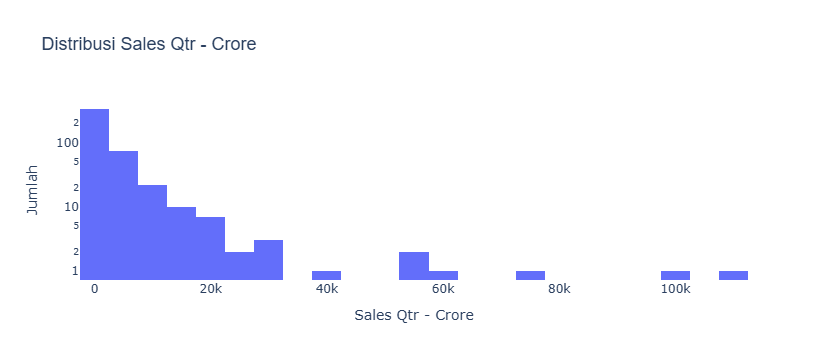

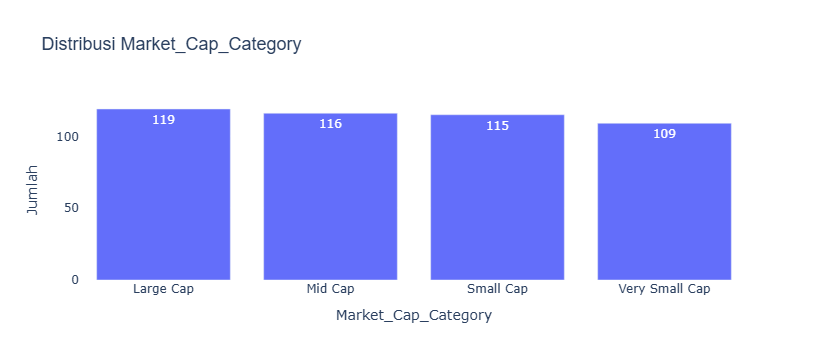

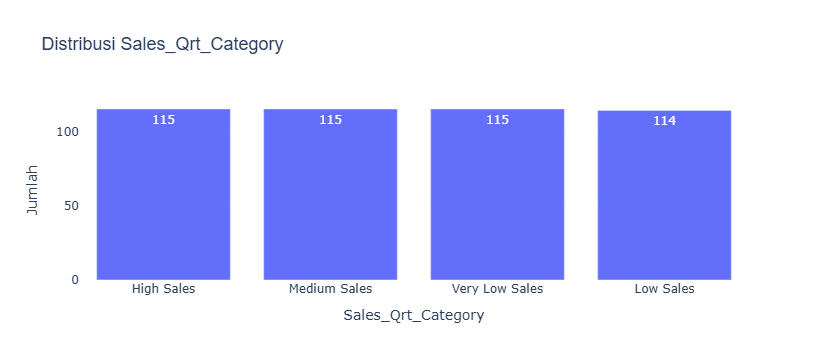

In [11]:
import plotly.express as px
import pandas as pd

# Asumsi df sudah didefinisikan dan berisi data yang diperlukan

# Tentukan kolom yang ingin dipetakan
kolom_kolom = ['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Market_Cap_Category', 'Sales_Qrt_Category']

# Iterasi melalui setiap kolom dan buat bar chart atau histogram
for kolom in kolom_kolom:
    try:
        if kolom not in df.columns:
            print(f"Kolom {kolom} tidak ada di DataFrame")
            continue
        
        # Cek apakah kolom merupakan tipe kategorikal
        if df[kolom].dtype == 'object' or df[kolom].dtype.name == 'category':
            # Hitung jumlah kejadian setiap nilai unik
            hitung_kolom = df[kolom].value_counts().reset_index()
            hitung_kolom.columns = [kolom, 'jumlah']
            
            # Buat bar chart menggunakan plotly.express
            fig = px.bar(
                hitung_kolom,
                x=kolom,
                y='jumlah',
                title=f'Distribusi {kolom}',
                labels={kolom: kolom, 'jumlah': 'Jumlah'},
                text='jumlah'
            )
            
            # Perbarui layout untuk keterbacaan yang lebih baik
            fig.update_layout(
                xaxis_title=kolom,
                yaxis_title='Jumlah',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'},
                showlegend=False
            )
            
            # Tampilkan grafik
            fig.show()

        # Jika kolom adalah tipe numerik (int64 atau float64)
        elif df[kolom].dtype in ['int64', 'float64']:
            # Buat histogram untuk kolom numerik
            fig = px.histogram(
                df,
                x=kolom,
                title=f'Distribusi {kolom}',
                labels={kolom: kolom, 'count': 'Jumlah'},
                nbins=30,  # Pilihan untuk menyesuaikan jumlah bin
                log_y=True  # Pilihan untuk menggunakan skala logaritmik pada sumbu Y jika diperlukan
            )
            
            # Perbarui layout untuk keterbacaan yang lebih baik
            fig.update_layout(
                xaxis_title=kolom,
                yaxis_title='Jumlah',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                showlegend=False
            )
            
            # Tampilkan grafik
            fig.show()
    
    except Exception as e:
        print(f"Tidak dapat membuat grafik untuk kolom {kolom}: {e}")


In [22]:
df

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
0,Reliance Inds.,583436.72,99810.00,Large Cap,High Sales
1,TCS,563709.84,30904.00,Large Cap,High Sales
2,HDFC Bank,482953.59,20581.27,Large Cap,High Sales
3,ITC,320985.27,9772.02,Large Cap,High Sales
4,H D F C,289497.37,16840.51,Large Cap,High Sales
...,...,...,...,...,...
454,Prime Focus,3031.50,609.61,Very Small Cap,Low Sales
455,Lak. Vilas Bank,3029.57,790.17,Very Small Cap,Low Sales
456,NOCIL,3026.26,249.27,Very Small Cap,Very Low Sales
457,Orient Cement,3024.32,511.53,Very Small Cap,Very Low Sales


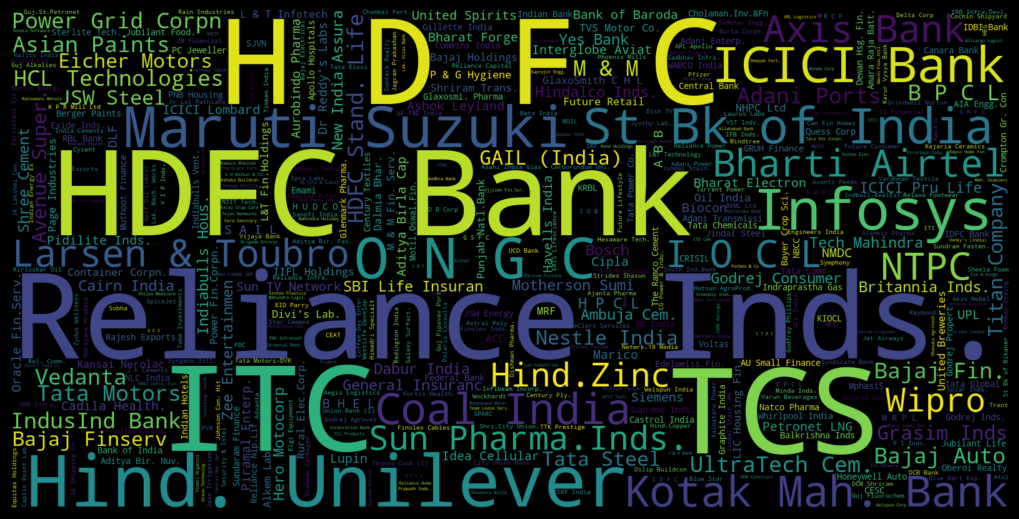

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Pastikan df sudah didefinisikan dan berisi data
# Asumsi df adalah DataFrame dan stop_words_list adalah daftar stopwords

# Daftar stopwords tambahan yang dapat dimodifikasi sesuai kebutuhan
stop_words_list = set(STOPWORDS)

# Menghasilkan jumlah frekuensi dari kolom 'Name'
counts = Counter(df["Name"].dropna().apply(lambda x: str(x)))

# Membuat WordCloud dari frekuensi
wcc = WordCloud(
    background_color="black",  # Warna latar belakang
    width=1600, height=800,  # Ukuran gambar
    max_words=2000,  # Jumlah maksimum kata yang ingin ditampilkan
    stopwords=stop_words_list  # Daftar stopwords untuk diabaikan
)

# Menghasilkan word cloud dari frekuensi
wcc.generate_from_frequencies(counts)

# Menampilkan word cloud
plt.figure(figsize=(10, 5), facecolor='k')  # Ukuran dan warna latar belakang hitam
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")  # Menghilangkan sumbu
plt.tight_layout(pad=0)  # Menghilangkan padding
plt.show()
